In [1]:
## 绘制参数变化时的测试准确率变化3d散点图和曲线图 ##
## draw_3D_plot2需要matlab拟合的draw_fitting3D_data文件数据##
import numpy as np
import math
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
import pickle
import scipy.io as scio

In [2]:
save_image_file = './image_save/'
save_data_file = './data_save/'
save_test_best_parameter_file = "./test_best_parameter_save/"

In [3]:
# 获得全部参数空间值
def get_all_parameter(res_seq : list):
    X = []
    Y = []
    Z = []
    for index in res_seq: 
        with open(save_test_best_parameter_file+'parameter_test_result'+str(index)+'.pkl', 'rb') as f:
            data = pickle.load(f)
            x = sorted(list(set([i[2] for i in data])))
            y = sorted(list(set([i[1] for i in data])))
            x,y = np.meshgrid(x,y)
            z = np.zeros((x.shape[0],x.shape[1]))
            for i in range(x.shape[0]):
                for j in range(x.shape[1]):
                    for k in data:
                        if k[2] == x[i][j] and k[1] == y[i][j]:
                            z[i][j] = k[3]
            X.append(x)
            Y.append(y)
            Z.append(z)
    return X,Y,Z

# 获得经由matlab拟合后的参数空间值
def get_all_parameter2(res_seq : list):
    X = []
    Y = []
    Z = []
    for index in res_seq: 
        data = scio.loadmat(save_data_file+'./draw_fitting3D_data'+str(index)+'.mat')
        X.append(data['X'])
        Y.append(data['Y'])
        Z.append(data['Z'])
    return X,Y,Z

In [4]:
# 绘制3D散点参数-准确率图
def draw_3D_scatter(X,Y,Z,res_seq):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')
    color_list = ['blue','red','green','brown','purple','yellow','orange']
    marker_list = ['x','o','*','+','^','s','D']
    for i in range(len(X)):
         ax.scatter3D(X[i], Y[i], Z[i], c=color_list[i], marker=marker_list[i],label='K_in='+str(res_seq[i]))      # 渐变颜色
    ax.set_zlim(0,1)
    ax.view_init(elev=25, azim=10)
    plt.title('Accuracy scatter plot',fontsize = 12)
    ax.set_xlabel("interval time",fontsize = 10, color = 'black')
    ax.set_ylabel("time frame",fontsize = 10, color = 'black')
    ax.set_zlabel("Accuracy",fontsize = 10, color = 'black', labelpad=1,rotation=20)
    ax.set_yticks(np.arange(1,5.1,0.5))
    ax.legend(loc='upper right',bbox_to_anchor=(1.1,1))
    plt.show()

# 绘制各个3D曲面参数-准确率图
def draw_3D_plot(X,Y,Z,K_in):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_wireframe(X, Y, Z, 
                rstride = 1,   # row 行步长
                cstride = 1,  # colum 列步长
                cmap=plt.cm.hot)      # 渐变颜色
    ax.set_zlim(0,1)
    ax.set_title("K_in="+str(K_in),fontsize = 10, color = 'black', pad=1)
    ax.set_xlabel("interval time",fontsize = 10, color = 'black')
    ax.set_ylabel("time frame",fontsize = 10, color = 'black')
    ax.set_zlabel("Accuracy",fontsize = 10, color = 'black',labelpad=2)
    ax.set_yticks(np.arange(1,5.1,0.5))
    ax.view_init(elev=25, azim=10)
    plt.show()

# 绘制全部3D曲面参数-准确率图
def draw_3D_plot2(X,Y,Z,K_in):
    
    # 设置字体为Times New Roman
    plt.rc('font',family='Times New Roman')
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    clist1 = [[255/256,192/256,203/256],[199/256,21/256,133/256]]
    Pinkscmp = mcolors.LinearSegmentedColormap.from_list('chaos',clist1,N=128)
    
    clist2 = plt.cm.Reds
    Redscmp = mcolors.ListedColormap(clist2(np.linspace(0.5, 0.9, 128)))
    
    clist3 = [[222/256,184/256,135/256],[139/256,69/256,19/256]]
    Brownscmp = mcolors.LinearSegmentedColormap.from_list('chaos',clist3,N=128)
    
    clist4 = plt.cm.Blues
    Bluescmp = mcolors.ListedColormap(clist4(np.linspace(0.5, 0.9, 128)))
    
    clist5 = plt.cm.Purples
    Purplescmp =  mcolors.ListedColormap(clist5(np.linspace(0.5, 0.9, 128)))
    
    clist6 = plt.cm.Greens
    Greenscmp = mcolors.ListedColormap(clist6(np.linspace(0.5, 0.9, 128)))
    
    clist7 = plt.cm.Oranges
    Orangescmp = mcolors.ListedColormap(clist7(np.linspace(0.4, 0.6, 128)))
    clist7 = [[255/256,204/256,153/256],[255/256,128/256,0/256]]
    Orangescmp = mcolors.LinearSegmentedColormap.from_list('chaos',clist7,N=128)
    
    cmap_list = [Pinkscmp,Redscmp,Orangescmp,Bluescmp,Purplescmp,Greenscmp,Brownscmp]
    
    ax.set_zlim(0,1)
    for i in range(len(K_in)):
        surface = ax.plot_surface(X[i], Y[i], Z[i], 
                    rstride = 1,   # row 行步长
                    cstride = 1,  # colum 列步长
                    cmap=cmap_list[i], # 渐变颜色
                    label='$K_{in}='+str(K_in[i])+'$',
                    alpha=0.75)      
        
    ax.set_xlabel("Time Step Interval",fontsize = 11, color = 'black')
    ax.set_ylabel("Time Frame",fontsize = 11, color = 'black')
    ax.set_zlabel("Accuracy",fontsize = 11, color = 'black',labelpad=2)
    # 关闭默认方向，再旋转
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(ax.get_zlabel(),rotation = 90)  
    
    ax.set_yticks(np.arange(1,5.1,0.5))

    ax.view_init(elev=25, azim=10)
    ax.legend(loc='upper right', bbox_to_anchor=(1.05,0.9), frameon=False)
    
    plt.savefig(save_image_file+'Accurancy_3Dplot.jpg', bbox_inches = 'tight', pad_inches = 0.05, dpi = 600)
    plt.tick_params(axis='both',direction='in')
    plt.show()
    plt.rcdefaults()

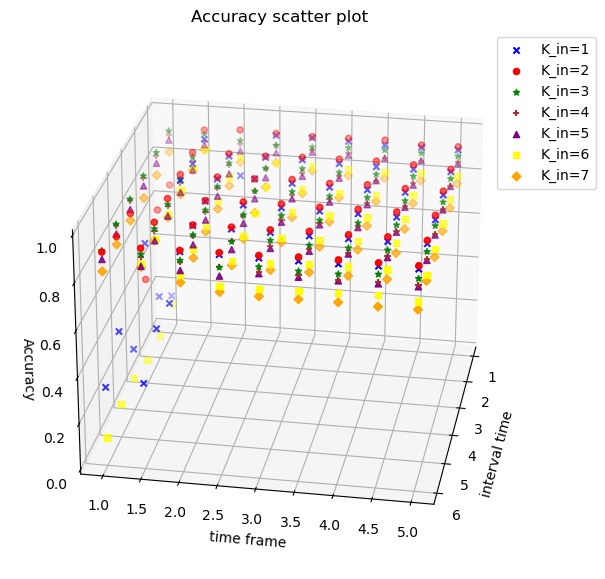

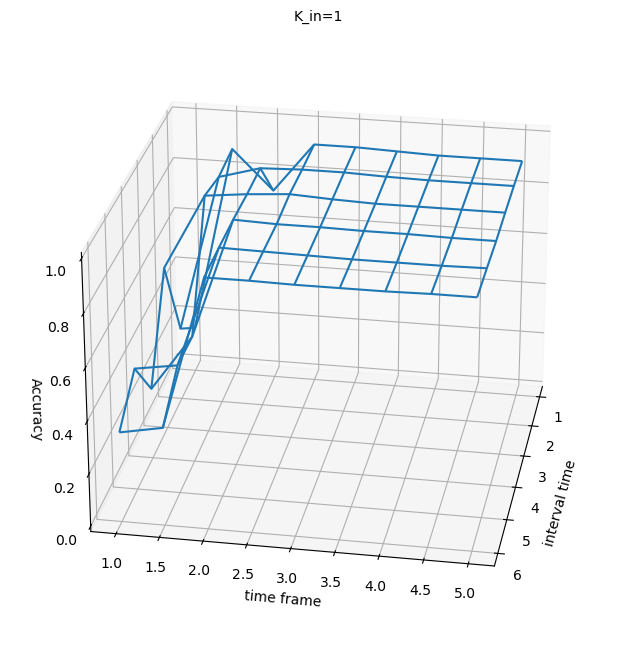

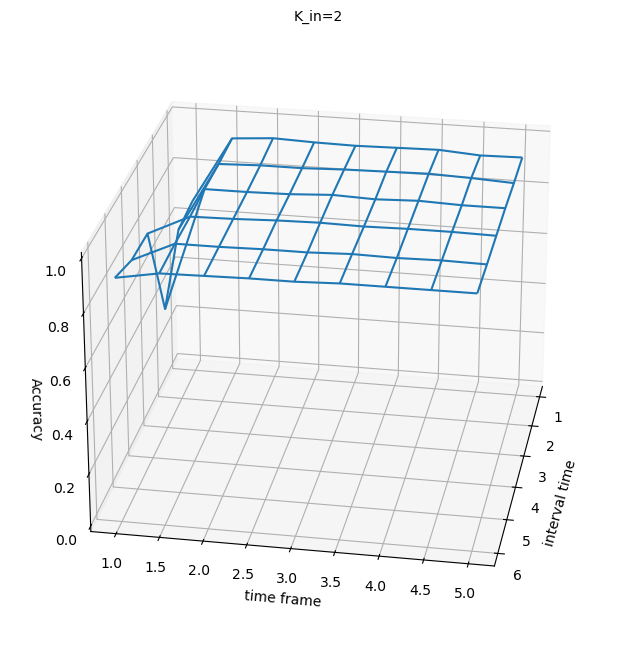

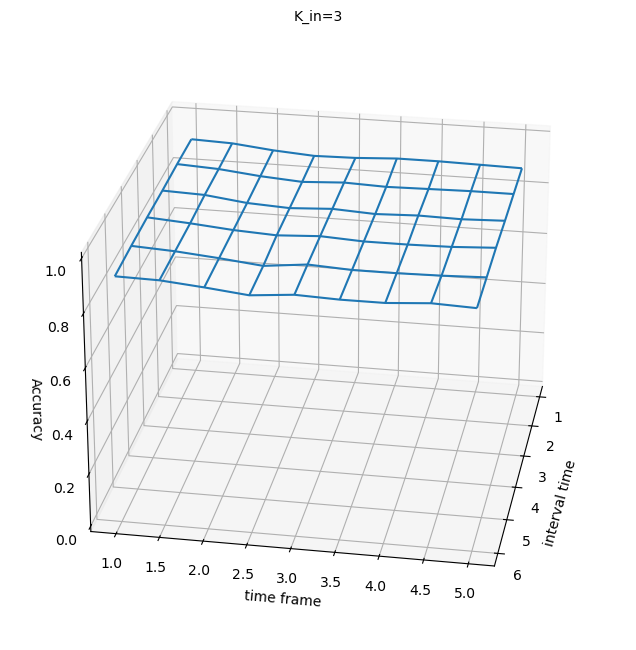

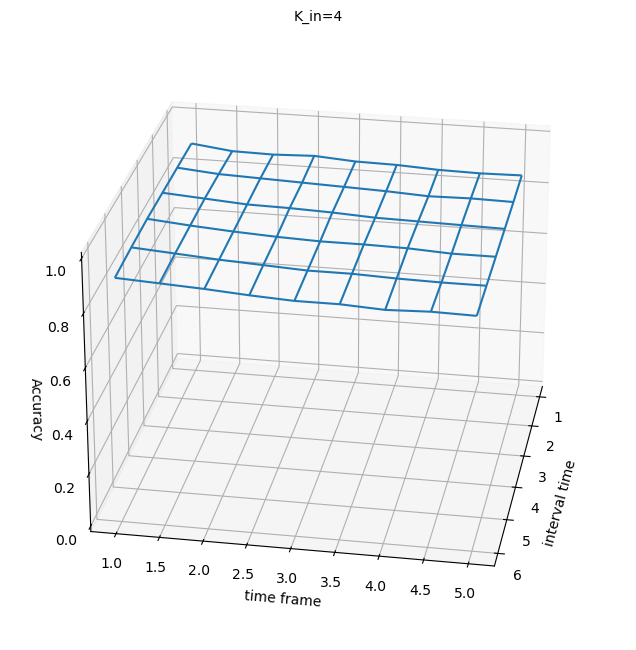

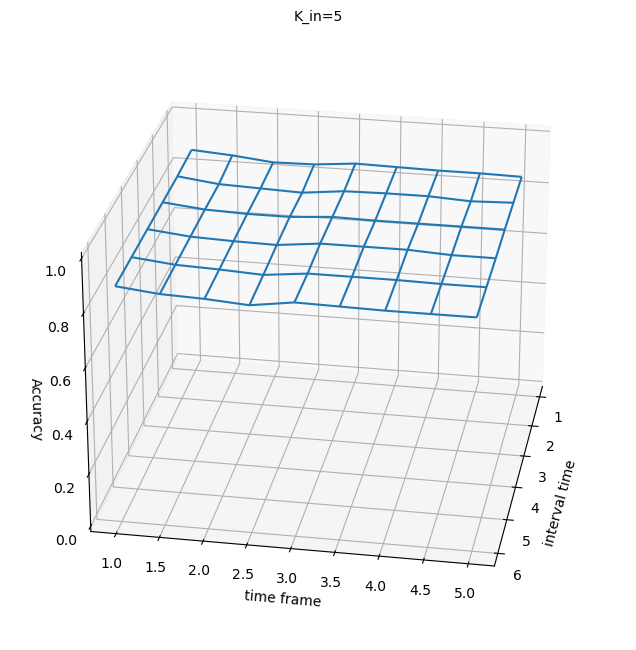

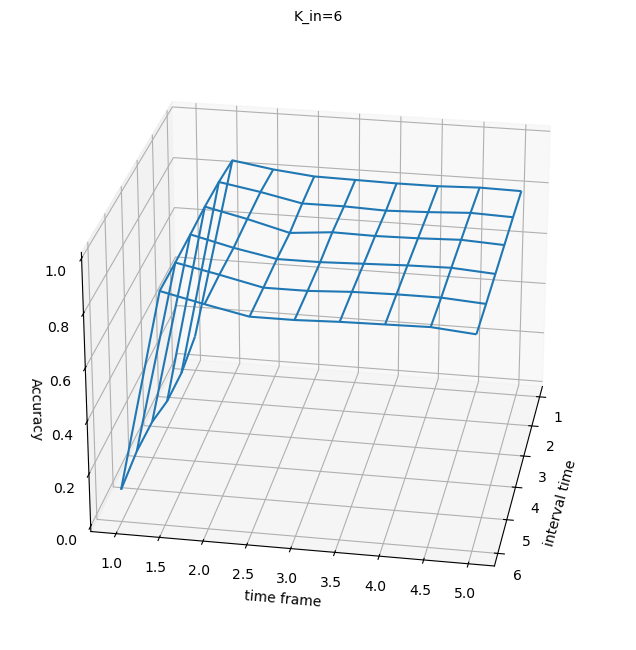

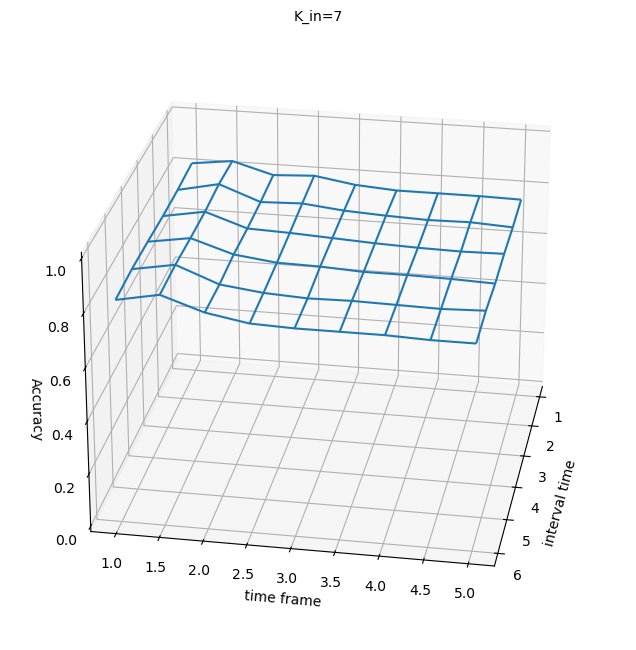

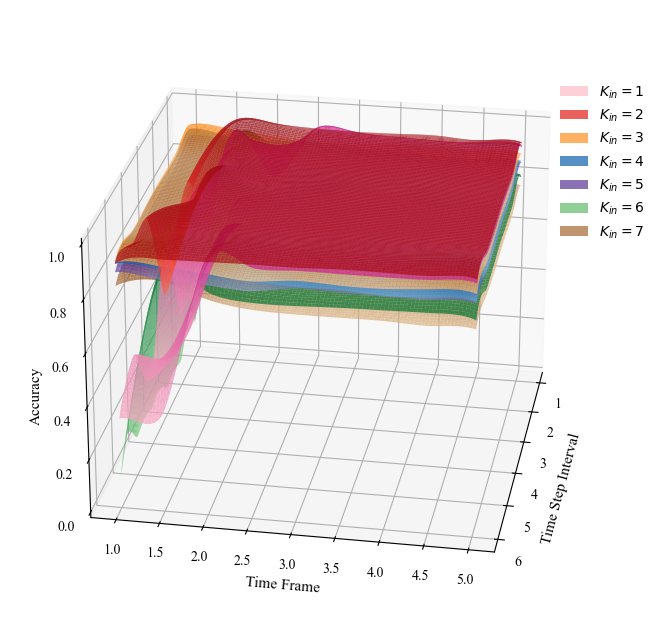

In [5]:
# 正式绘制
res_seq = [i for i in range(1,8,1)]

X,Y,Z = get_all_parameter(res_seq)
X2,Y2,Z2 = get_all_parameter2(res_seq)
draw_3D_scatter(X,Y,Z,res_seq)
for i in range(len(res_seq)):
    draw_3D_plot(X[i],Y[i],Z[i],res_seq[i])
draw_3D_plot2(X2,Y2,Z2,res_seq)